<a href="https://colab.research.google.com/github/jackhegarty3/Data110-Fall2025/blob/main/Data110_JackHegarty_Week5and6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Task 1 - Dataset Overview

From the above Titanic dataset, I will use the columns survived (whether or not the passenger survived the crash), pclass (passenger class from 1st to 3rd), sex, age, and fare (price of the passenger's ticket). These variables will help me explore the relationships between the different groups of passengers on the Titanic and hypothesize correlations based on my findings.

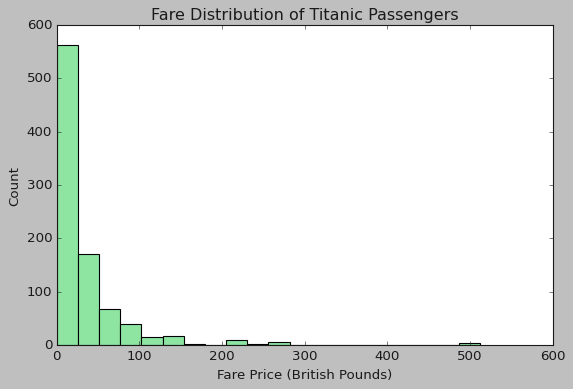

In [60]:
plt.style.use('classic')
sns.set_color_codes(palette='pastel')
plt.figure(figsize=(8,5))
plt.hist(titanic['fare'], bins=20, color= 'g', edgecolor='black')
plt.title('Fare Distribution of Titanic Passengers')
plt.xlabel('Fare Price (British Pounds)')
plt.ylabel('Count')

plt.show()

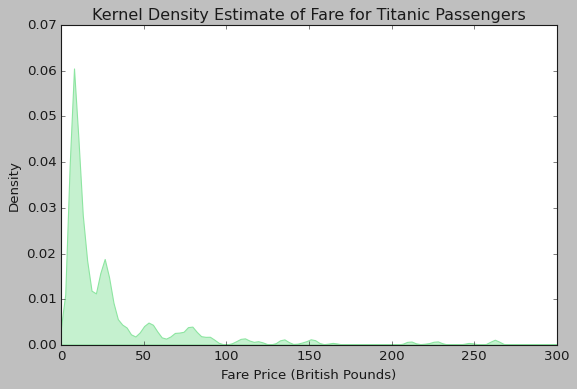

In [48]:
plt.figure(figsize=(8,5))
sns.kdeplot(titanic['fare'], bw_adjust=0.2, fill=True, color='g', alpha=0.5)
plt.title('Kernel Density Estimate of Fare for Titanic Passengers')
plt.xlabel('Fare Price (British Pounds)')
plt.ylabel('Density')
plt.xlim(0, 300)
plt.show()

Task 2 - Fare Distribution

Based on the right skew of the above plots, it is evident that the vast majority of the passengers on the Titanic bought tickets for less than 50 pounds. Outliers exist on the right side of the distribution as just a few tickets were purchased for approximately 200, 300, and even 500 pounds. This may suggest that the population of the passengers on the Titanic were largely common folk as opposed to the wealthy, but could also be due to a limited number of high-class accomodations on the ship.

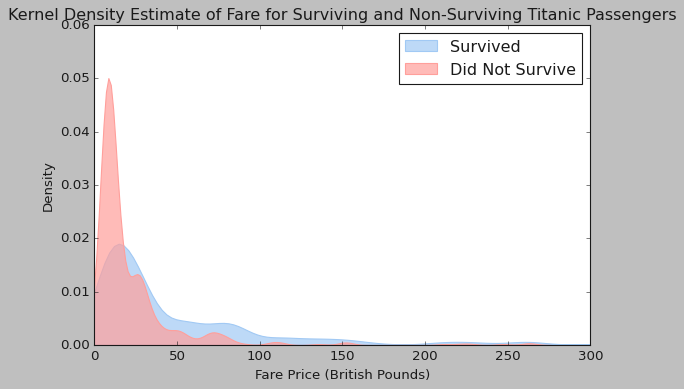

In [51]:
plt.figure(figsize=(8,5))
sns.kdeplot(titanic[titanic['survived'] == 1]['fare'], bw_adjust=0.5, fill=True, color='b', alpha=0.7, label='Survived')
sns.kdeplot(titanic[titanic['survived'] == 0]['fare'], bw_adjust=0.5, fill=True, color='r', alpha=0.7, label='Did Not Survive')
plt.title('Kernel Density Estimate of Fare for Surviving and Non-Surviving Titanic Passengers')
plt.xlabel('Fare Price (British Pounds)')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 300)
plt.show()

Task 3 - Fare x Survival

The overlaid KDEs demonstrate the relationship between the Titanic passengers' fare price and whether or not they survived the crash. Although the means and skews are similar between the two groups due to the large percentage of fares below 50 pounds, it is evident that those who did not survive were largely those with the cheapest tickets. The 'Survived' KDE also skews slightly less harshly than the 'Did Not Survive' KDE, signalling that almost everyone with a ticket over 50 pounds was more likely than not to survive.

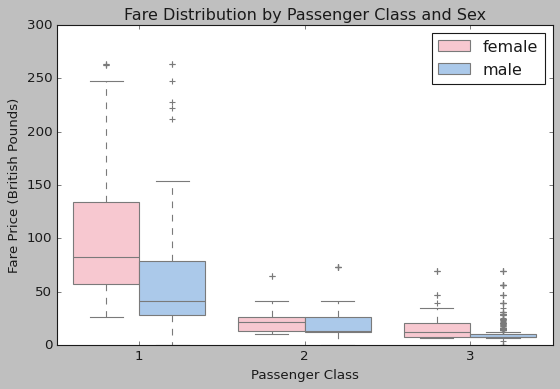

In [62]:
plt.figure(figsize=(8,5))
sns.set_palette('pastel')
color = ['pink', 'b']
sns.boxplot(x='pclass', y='fare', hue='sex', data=titanic, palette=color)
plt.title('Fare Distribution by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Fare Price (British Pounds)')
plt.ylim(0, 300)
plt.legend()
plt.show()

Task 4 - Boxplot across multiple groups

Using the above boxplot, it becomes apparent that Class 1 passengers generally paid much more than Class 2 & 3 passengers for fare, and Class 1 women had more expensive fares than Class 1 men. Class 1 passenger fares also ranged in value far more than Class 2 & 3 passenger fares, which stayed relatively constant.

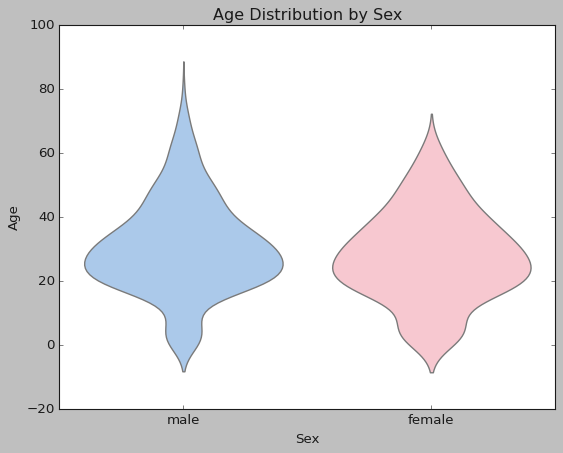

In [79]:
color=['b', 'pink']
sns.violinplot(x='sex', y='age', hue='sex', data=titanic, inner=None, palette=color, legend = False)
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

Task 5 - Violin

According to the above violin plot, the most common ages of both male and female Titanic passengers were concentrated between 20 and 30. There are only a few slight differences: there is a slightly greater percentage of female young children compared to males, and there are more elderly male outliers than female, extending the male plot just a bit higher.

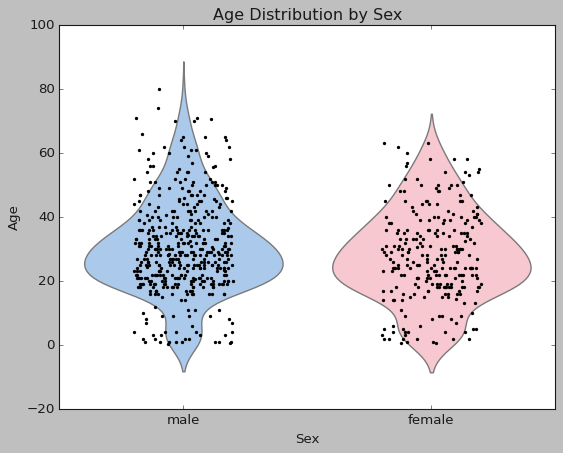

In [82]:
sns.violinplot(x='sex', y='age', hue='sex', data=titanic, inner=None, palette=color, legend = False)
sns.stripplot(x='sex', y='age', data=titanic, jitter=0.2, size=3, color='black')
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

Task 6 - Strip

When the strip plot is overlaid, it confirms that the upper outliers  males were older than the upper outlier females. However, while the violin plots suggest that there were fewer male young children than female young children, the strip plot shows that there were a similar number of children. The difference between the violin plots was due to there being a greater number of male passengers than female passengers. The concentration of males aged 20-40 made the width of the violin plot shrink as it approached the upper and lower limits.